Chapter 1 
=====
*** 

## The Bayesian state of mind  
Bayesians interpret a probability as measure of *belief*,or confidence,of an event occuring.To align ourselves with traditional probability notation,we denote our belief about event A as P(A).We call this quantity the ***prior probability***.We denote our updated belief as P(A|X),interpreted as the probability of A giben the evidence X.We call the updated belief the ***posterior probability*** so as to contrast it with the prior probability.  

For example:  
P(A): the coin has a 50 percent chance of beging Heads.
P(A|X): You look at the coin,observe a Heads has landed,denote this information X,and trivially assign probability 1.0 to Heads and 0.0 to Tails.  

It's clear that we did not completely discard the prior bilief after seeing new evidence X,but we *re-weighted* the prior to incorporate the new evidence (i.e.we put more weight,or confidence,on some beliefs versus others).  

By introducing prior uncertainly about events,we are already admitting that any guess we make is potentially very wrong.After observing data,evidence,or other information,we update our beliefs,and our guess becomes less wrong.THis is the alternative side of the prediction coin,where typically we try to be more right.  

## incorporating evidence  
As we acquire more and more instances of evidence,our prior belief is *washed out* by the new evidence.This is to be expected.For example,if your prior belief is something ridiculous,like "I expect the sun to explode today",and each day you are proved wrong,you would hope that any inference would correct you,or at least align your beliefs better.Bayesian inference will correct this belief.  


## Our Bayesian framework  
Updating our belief is done via the following equation,known as Bayes' Theorem:
\begin{align}
 P( A | X ) = & \frac{ P(X | A) P(A) } {P(X) } \\\\
                & \propto P(X | A) P(A)\;\; (\propto \text{is proportional to } )
\end{align}

##### Example: Bug, or just sweet, unintended feature?


Let $A$ denote the event that our code has **no bugs** in it. Let $X$ denote the event that the code passes all debugging tests. For now, we will leave the prior probability of no bugs as a variable, i.e. $P(A) = p$. 

We are interested in $P(A|X)$, i.e. the probability of no bugs, given our debugging tests $X$. To use the formula above, we need to compute some quantities.

What is $P(X | A)$, i.e., the probability that the code passes $X$ tests *given* there are no bugs? Well, it is equal to 1, for a code with no bugs will pass all tests. 

$P(X)$ is a little bit trickier: The event $X$ can be divided into two possibilities, event $X$ occurring even though our code *indeed has* bugs (denoted $\sim A\;$, spoken *not $A$*), or event $X$ without bugs ($A$). $P(X)$ can be represented as:

\begin{align}
P(X ) & = P(X \text{ and } A) + P(X \text{ and } \sim A) \\\\[5pt]
 & = P(X|A)P(A) + P(X | \sim A)P(\sim A)\\\\[5pt]
& = P(X|A)p + P(X | \sim A)(1-p)
\end{align}

We have already computed $P(X|A)$ above. On the other hand, $P(X | \sim A)$ is subjective: our code can pass tests but still have a bug in it, though the probability there is a bug present is reduced. Note this is dependent on the number of tests performed, the degree of complication in the tests, etc. Let's be conservative and assign $P(X|\sim A) = 0.5$. Then

\begin{align}
P(A | X) & = \frac{1\cdot p}{ 1\cdot p +0.5 (1-p) } \\\\
& = \frac{ 2 p}{1+p}
\end{align}
This is the posterior probability. What does it look like as a function of our prior, $p \in [0,1]$? 

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

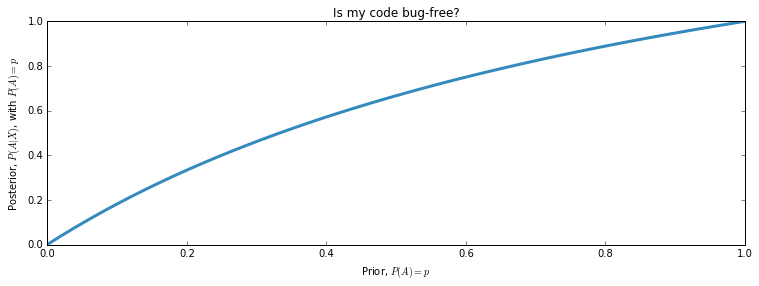

In [4]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 * p / (1 + p), color="#348ABD", lw=3)
# plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
# plt.scatter(0.2, 2 * (0.2) / 1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Is my code bug-free?")

We can see the biggest gains if we observe the $X$ tests passed when the prior probability, $p$, is low. Let's settle on a specific value for the prior. I'm a strong programmer (I think), so I'm going to give myself a realistic prior of 0.20, that is, there is a 20% chance that I write code bug-free. To be more realistic, this prior should be a function of how complicated and large the code is, but let's pin it at 0.20. Then my updated belief that my code is bug-free is 0.33. 

Recall that the prior is a probability: $p$ is the prior probability that there *are no bugs*, so $1-p$ is the prior probability that there *are bugs*.

Similarly, our posterior is also a probability, with $P(A | X)$ the probability there is no bug *given we saw all tests pass*, hence $1-P(A|X)$ is the probability there is a bug *given all tests passed*. What does our posterior probability look like? Below is a chart of both the prior and the posterior probabilities. 

##### Example: Mandatory coin-flip example

Every statistics text must contain a coin-flipping example, I'll use it here to get it out of the way. Suppose, naively, that you are unsure about the probability of heads in a coin flip (spoiler alert: it's 50%). You believe there is some true underlying ratio, call it $p$, but have no prior opinion on what $p$ might be. 

We begin to flip a coin, and record the observations: either $H$ or $T$. This is our observed data. An interesting question to ask is how our inference changes as we observe more and more data? More specifically, what do our posterior probabilities look like when we have little data, versus when we have lots of data. 

Below we plot a sequence of updating posterior probabilities as we observe increasing amounts of data (coin flips).

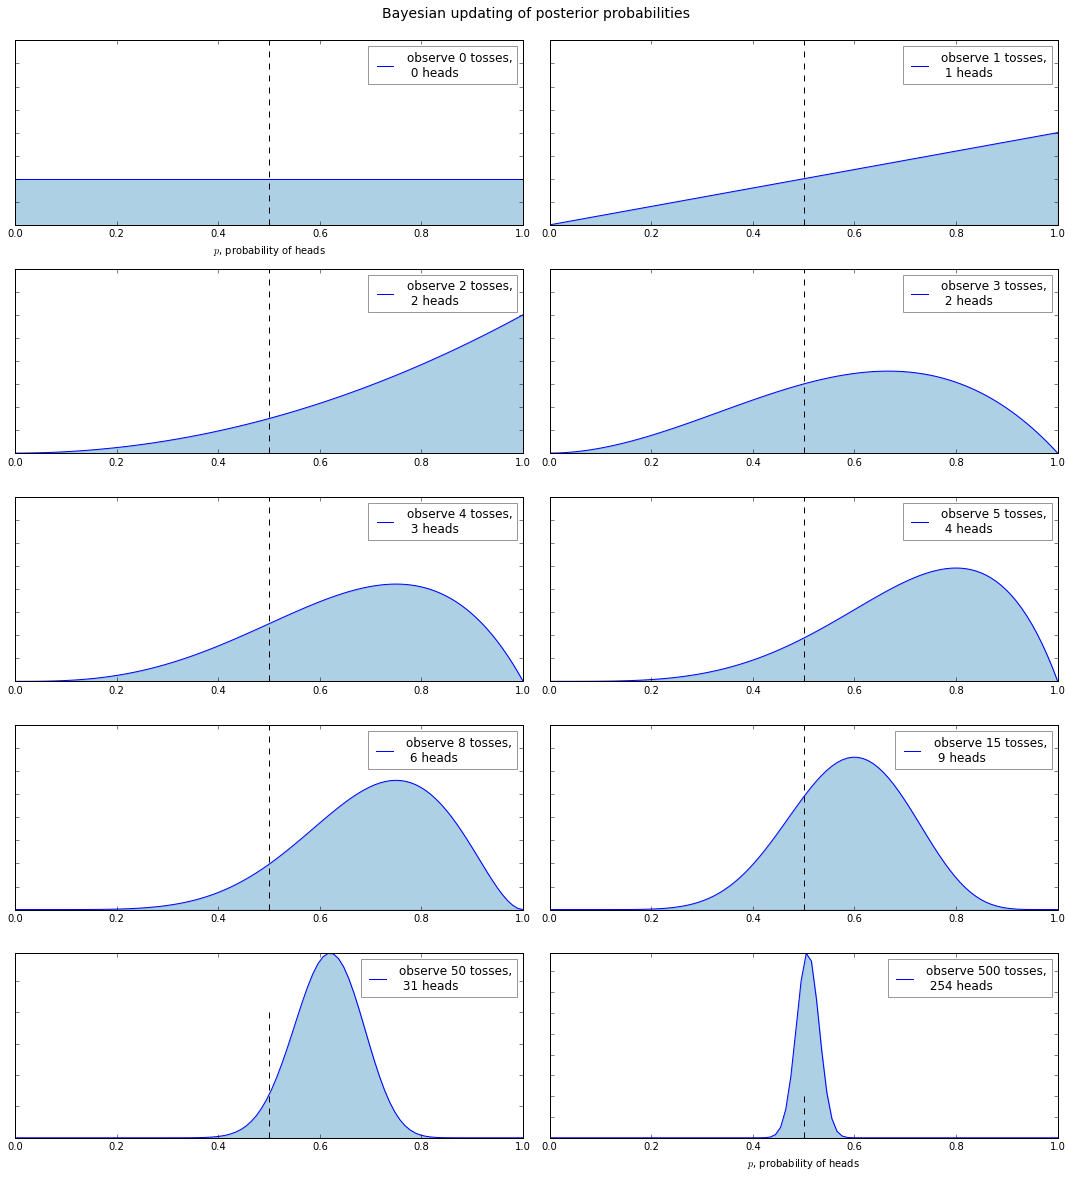

In [7]:
"""
The book uses a custom matplotlibrc file, which provides the unique styles for
matplotlib plots. If executing this book, and you wish to use the book's
styling, provided are two options:
    1. Overwrite your own matplotlibrc file with the rc-file provided in the
       book's styles/ dir. See http://matplotlib.org/users/customizing.html
    2. Also in the styles is  bmh_matplotlibrc.json file. This can be used to
       update the styles in only this notebook. Try running the following code:

        import json, matplotlib
        s = json.load( open("../styles/bmh_matplotlibrc.json") )
        matplotlib.rcParams.update(s)

"""

# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(15,16)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

________
## Probability Distributions  
We can divide random variables into three classifications:
* **discrete**
* **continuous**
* **mixed**  

**Expected Value**:The EV for a given probability distribution can be describled as "the mean value in the long run for many repeated samples from that distribution."  

## 1. Poisson-distribution:
$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots, \; \; \lambda \in \mathbb{R}_{>0} $$

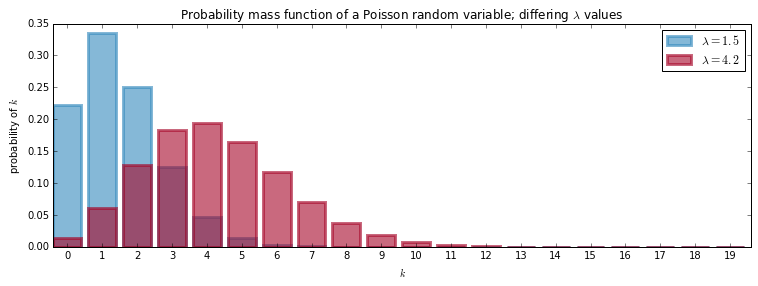

In [9]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(20)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values")

**Notice** that k should be positive integer number (discrete),so its presented by bar chart.  

$\lambda$ is called a parameter of the distribution,and it controls the distribution's shape.For the Poisson distribution,$\lambda$ can be any positive number.By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution.   

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

## 2. exponential  
The density function for an exponential random variable looks like this:
$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$  

Writed as:
$$Z \sim Exp(\lambda)$$  

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

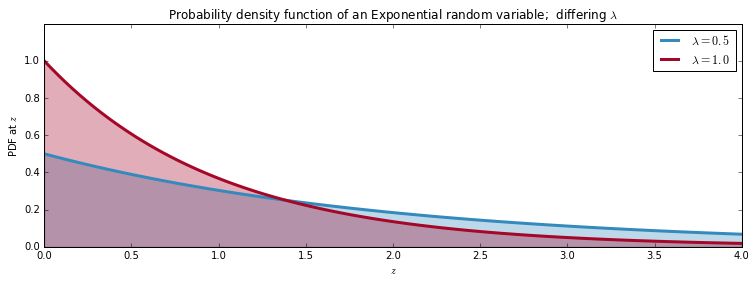

In [11]:
a=np.linspace(0,4,100)
expo=stats.expon
lambda_=[0.5,1]

for l,c in zip(lambda_,colours):
    plt.plot(a,expo.pdf(a,scale=1./l),lw=3,
            color=c,label='$\lambda =%.1f$'%l)
    plt.fill_between(a,expo.pdf(a,scale=1./l),color=c,alpha=0.33)

plt.legend()
plt.ylabel('PDF at $z$')
plt.xlabel('$z$')
plt.ylim(0,1.2)
plt.title('Probability density function of an Exponential random variable; \
 differing $\lambda$')